<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [372]:
hh_db = pd.read_csv('data/hh_database.csv', sep=';')

In [373]:
hh_work_db = hh_db.copy()
print(f'Размерность загруженной таблицы: ',hh_work_db.shape)

Размерность загруженной таблицы:  (44744, 12)


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [374]:
hh_work_db.head(3)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [375]:
hh_work_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [376]:
#ваш код здесь
null_count_dict = {}
for column in hh_work_db.columns:
    null_count_dict[column] = hh_work_db[hh_work_db[column].isna()].shape[0]
    
display(pd.DataFrame.from_dict(null_count_dict, orient= 'Index',columns=['Количество пустых значений']))

,Количество пустых значений
"Пол, возраст",0
ЗП,0
Ищет работу на должность:,0
"Город, переезд, командировки",0
Занятость,0
График,0
Опыт работы,168
Последнее/нынешнее место работы,1
Последняя/нынешняя должность,2
Образование и ВУЗ,0


5. Выведите основную статистическую информацию о столбцах.


In [377]:
display(hh_work_db.describe())
unique_count = hh_work_db['Опыт работы'].nunique()
print(f'В столбце «Опыт работы» содержится {unique_count} уникальных значений')
print(f'Самая распространённая искомая должность:',hh_work_db['Ищет работу на должность:'].value_counts(ascending=False).index[0])

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


В столбце «Опыт работы» содержится 44413 уникальных значений
Самая распространённая искомая должность: Системный администратор


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [378]:
# При анализе признака выясняем, что категория образования находится до ключевого слова "образование"
# Применим lambda функцию к столбцу. Возьмем срез первых символов до ключевого слова в нижнем регистре

hh_work_db['Образование'] = hh_work_db['Образование и ВУЗ'].apply(lambda x: x[0:x.find('образование')-1].lower())
#Удалим ненужный признак
hh_work_db.drop('Образование и ВУЗ', axis=1, inplace= True)


school_edu = hh_work_db[hh_work_db['Образование']=='среднее'].shape[0]
print(f'{school_edu} соискателей имеет средний уровень образования (школьное образование)')

559 соискателей имеет средний уровень образования (школьное образование)


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [379]:
#В качестве признака "Пол" возьмем первый символ строки
hh_work_db['Пол']= hh_work_db['Пол, возраст'].apply(lambda x: x[0])
print(f'Процент Женщин среди соискателей:', round(hh_work_db['Пол'].value_counts(normalize=True).loc['Ж']*100,2))

#Для выделения возраста:
#разделим признак по разделителю " , ", возьмем второй эелемент списка, 
#разделим на элементы и возьмем первый элемент
hh_work_db['Возраст']= hh_work_db['Пол, возраст'].apply(lambda x: int(x.split(' , ')[1].split()[0]))
print(f'Средний возраст соискателей:',round(hh_work_db['Возраст'].mean(),1))

#Удалим ненужный признак
hh_work_db.drop('Пол, возраст', axis= 1, inplace= True)

Процент Женщин среди соискателей: 19.07
Средний возраст соискателей: 32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [ ]:
"Напишем функцию подсчета опыта работы (в месяцах)"

def experience(feature):
    
    #проверяем, является ли значение пустым
    if feature is np.nan or feature.lower()=="не указано": 
        return np.nan
    
    else:   
        "Опыт работы в признаке находится перед двойным пробелом"     
        #разделим признак по разделителю, возьмем первый элемент из списка и повторно разделим
        feature = feature.split("  ")[0].split() 
        months = 0                                  #Пустой счетчик месяцев
        
        #Проверим, начинается ли слово в признаке с ключевого значения и обработаем предыдущее число
        for i, word in enumerate(feature):
            if word.startswith('год') or word.startswith('лет'):
                months += int(feature[i-1])*12      #если год -> умножим на 12 мес и добавим в счетчик
            elif word.startswith('мес'):
                months += int(feature[i-1])         #если мес -> добавим в счетчик
                
        return months

In [381]:
#создадим новый признак, удалим старый признак
hh_work_db['Опыт работы (месяц)'] = hh_work_db['Опыт работы'].apply(experience)
hh_work_db.drop('Опыт работы', axis= 1, inplace= True)

#найдем медианное значение
print(f'Медианный опыт работы (в месяцах):',int(hh_work_db['Опыт работы (месяц)'].median()))

Медианный опыт работы (в месяцах): 100


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [382]:
# Объявим функцию обработки признака
def city_reloc_trip_cat(feature):
    """Функция обработки признака, содержащего информацию:
        о городе, 
        о готовности к переезду, 
        о готовности к коммандировкам.

    Args:
        feature: принимает признак в датафрейме

    Returns:
        turple: (Город: text, Готовность к переезду: bool, Готовность к командировкам: bool)
    """
    
    #справочник городов-миллионников
    million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород',
                      'Казань', 'Челябинск','Омск', 
                      'Самара', 'Ростов-на-Дону', 'Уфа', 
                      'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    
    #справочник основных городов
    cities = ['Москва','Санкт-Петербург']
    
    # разделим признак по разделителю
    feature = feature.split(" , ")
    
    #обработаем города
    city = feature[0] #город - первый элемент списка
    if city in million_cities:
        city = "город-миллионник"
    elif city not in cities:
        city = "другие"
    
    #вычленим признаки командировок и переезда        
    relocation= False #признак готовности к переездам для пустых значений
    business_trip= False #признак готовности к командировкам для пустых значений
    for feat in feature[1::]:
        feat = feat.lower()
        #найдем элемент с переездами
        if 'перее' in feat:
            if 'не' in feat:
                relocation= False
            else:
                relocation= True
        #найдем элемент с командировками        
        if 'команд' in  feat:
            if 'не' in feat:
                business_trip= False
            else:
                business_trip= True
                
    return city, relocation, business_trip

In [383]:
#Определяем новые признаки, обернув созданную функцию в lambda (выделив нужный элемент кортежа)
hh_work_db['Город']= hh_work_db['Город, переезд, командировки'].apply(lambda x: city_reloc_trip_cat(x)[0])

hh_work_db['Готовность к переезду']= hh_work_db['Город, переезд, командировки'].apply(lambda x: city_reloc_trip_cat(x)[1])

hh_work_db['Готовность к командировкам']= hh_work_db['Город, переезд, командировки'].apply(lambda x: city_reloc_trip_cat(x)[2])

#удалим ненужный признак
hh_work_db.drop('Город, переезд, командировки', axis= 1, inplace= True)

print(f'Процент соискателей из Санкт-Петербурга:',round(hh_work_db['Город'].value_counts(normalize= True).loc['Санкт-Петербург']*100))

mask_1 = hh_work_db['Готовность к командировкам']
mask_2 = hh_work_db['Готовность к переезду']
print(f'Процент соискателей, готовых к переезду и коммандировкам:',round(hh_work_db[mask_1&mask_2].shape[0]/hh_work_db.shape[0]*100))

Процент соискателей из Санкт-Петербурга: 11
Процент соискателей, готовых к переезду и коммандировкам: 32


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [384]:
def unique_features(db, feature):
    """Функция определения уникальных категорий в датафрейме 
    
    Args:
        db (dataframe): Передаваемый датафрейм
        feature (text): признак датафрейма

    Returns:
        (list): Возвращает список уникальных значений в датафрейме
    """
    
    all_faetures = db[feature].unique()     #уникальные значения в таблице
    result = []                             #Пустая заготовка
    for row in all_faetures:                #перебираем элементы списка уникальных значений
        lst = row.split(', ')               #разбиваем элемент на список значений 
        for element in lst:
            if element not in result:       #Проверяем отсутствие элемента в уникальном списке
                result.append(element)      #добавляем элемент в список
    return result

#Поместим в employment_list список уникальных категорий Занятости
employment_list= unique_features(hh_work_db,'Занятость')

#Поместим в shedule_list список уникальных категорий Графика
shedule_list= unique_features(hh_work_db,'График')

#создадим новые признаки из каждого элемента в списке уникальных значений
for element in shedule_list:
    #с помощью lambda функции добавим True, если новый признак присутствует в текущем признаке, иначе False
    hh_work_db[element] = hh_work_db['График'].apply(lambda x: True if element in x else False)
    
for element in employment_list:
    hh_work_db[element] = hh_work_db['Занятость'].apply(lambda x: True if element in x else False)

#Удалим ненужные признаки
hh_work_db.drop(["График","Занятость"], axis= 1, inplace= True)

case1 = hh_work_db[(hh_work_db['проектная работа'])&(hh_work_db['волонтерство'])].shape[0]
print(f'Кол-во людей, которые ищут проектную работу и волонтерство:', case1)

case2=hh_work_db[(hh_work_db['вахтовый метод'])&(hh_work_db['гибкий график'])].shape[0]
print(f'Кол-во людей, которые хотят работать вахтовым методом и с гибким графиком:', case2)

Кол-во людей, которые ищут проектную работу и волонтерство: 436
Кол-во людей, которые хотят работать вахтовым методом и с гибким графиком: 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. \
Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [385]:
#Прочитаем и преобразуем DF с курсом валют
exchange_rates_db = pd.read_csv('data/ExchangeRates.csv', sep= ',')
#преобразуем формат даты
exchange_rates_db['date'] = pd.to_datetime(exchange_rates_db['date'], dayfirst= True, format= 'mixed').dt.date
#удалим ненужные столбцы
exchange_rates_db.drop(['per',"time","vol"], axis= 1, inplace= True) 

#Обработаем дату в резюме
hh_work_db['Обновление резюме'] = pd.to_datetime(hh_work_db['Обновление резюме'], dayfirst= True, format='mixed').dt.date

#Создадим справочник наименований валют
currency_ISO = {
    'USD': 'USD',
    'EUR': 'EUR',
    'KZT': 'KZT',
    'KGS': 'KGS',
    'бел.руб.': 'BYN',
    'грн.': 'UAH',
    'сум': 'UZS',
    'AZN': 'AZN'
}

#Создадим признак Валюта из признака ЗП и приведем к формату ISO
hh_work_db['Валюта'] = hh_work_db['ЗП'].apply(lambda x: x.split()[1])
hh_work_db['Валюта_ISO'] = hh_work_db['Валюта'].apply(lambda x: x if x == 'руб.' else currency_ISO[x])

#Создадим признак оклада в валюте из признака ЗП
hh_work_db['Оклад_валюта'] = hh_work_db['ЗП'].apply(lambda x: x.split()[0])

#Объеденим две таблицы по Валюте и дате
hh_work_db = hh_work_db.merge(
    exchange_rates_db, 
    how= 'left', 
    left_on=['Валюта_ISO','Обновление резюме'], 
    right_on=['currency','date'])

#Заполним пустые значения Proportion и Close
hh_work_db.fillna({'proportion':1,
                   'close':1},inplace= True)


#Посчитаем признак ЗП в руб
hh_work_db['ЗП (руб)'] = hh_work_db['Оклад_валюта'].astype('Float64')*hh_work_db['close']/hh_work_db['proportion']

#Почистим таблицу от лишних признаков
drop_list =['ЗП', 'Валюта', 'Валюта_ISO',
       'Оклад_валюта', 'currency', 'date', 'close', 'proportion']
hh_work_db.drop(drop_list,axis= 1, inplace= True)


median_payment = round(hh_work_db['ЗП (руб)'].median()/1000)
print(f'Медианное значение зарплаты сосикателей: {median_payment} тыс. руб.')

Медианное значение зарплаты сосикателей: 59 тыс. руб.


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

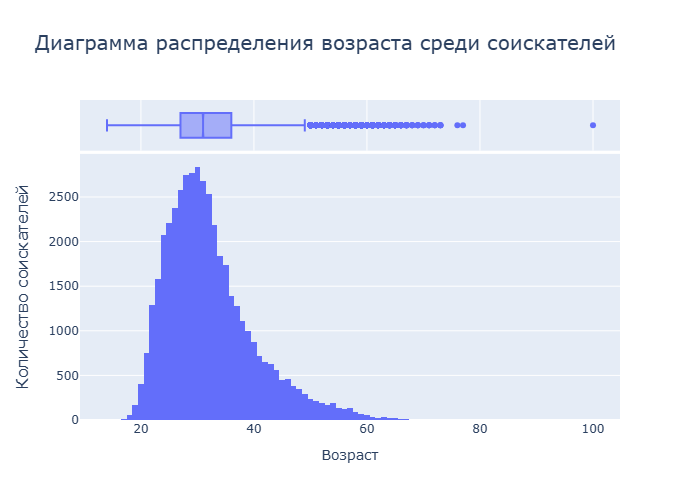

In [386]:
hist_age = px.histogram(
    hh_work_db,
    x= 'Возраст',
    title="Диаграмма распределения возраста среди соискателей",
    marginal= 'box',
    width= 900,
    height=800
);

#Зададим раздельные подписи для оси y
hist_age.update_yaxes(
    title_text='', 
    row=2,
    col=1
)

hist_age.update_yaxes(
    title_text='Количество соискателей',
    title_font=dict(size=16),
    row=1,
    col=1
)

hist_age.update_layout(
    title_font=dict(size=20)
)
hist_age.write_html("html/hist_age.html")
hist_age.show('png')

динамический график представлен по [ссылке](html/hist_age.html)

Из полученного графика видно:
- наибольшее количество соискателей **(мода)** в возрасте __30 лет__;
- __наиболее часто__ ищут работу в возрасте __от 27 до 36 лет__;
- __минимальный возраст__ соискателей составляет __14 лет__, в то время как __максимальный__ - __100 лет__
- исходя из полученной коробчатой диаграммы возраст соискателей _свыше 49 лет_ является _выбросом_, а возраст __100 лет__, скорее всего, технической ошибкой в данных

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

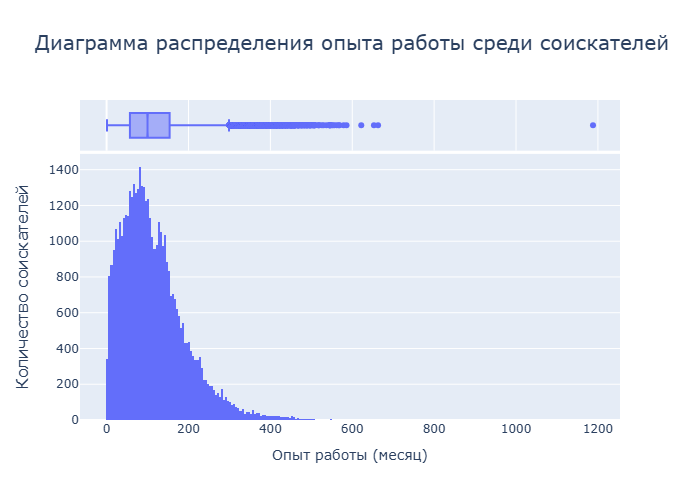

In [387]:
hist_expirience = px.histogram(
    hh_work_db,
    x= 'Опыт работы (месяц)',
    title="Диаграмма распределения опыта работы среди соискателей",
    marginal= 'box',
    width= 1000,
    height=600
);

#Зададим раздельные подписи для оси y
hist_expirience.update_yaxes(
    title_text='', 
    row=2,
    col=1
)

hist_expirience.update_yaxes(
    title_text='Количество соискателей',
    title_font=dict(size=16),
    row=1,
    col=1
)

hist_expirience.update_layout(
    title_font=dict(size=20)
)

hist_expirience.write_html('html/hist_expirience.html')
hist_expirience.show('png')

динамический график представлен по [ссылке](html/hist_expirience.html)

Из полученного графика видно:
- наибольшее количество соискателей **(мода)** имеют опыт работы в диапазоне __80-84 мес__;
- __минимальный__ опыт работы составляет __1 мес__, __максимальный__ - __1188 мес__
- __большинство соискателей__ имеют опыт работы __от 57 до 154 мес__;
- особенно выделяются (_аномалии_) единичные соискатели с опытом работы свыше __622 мес__.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


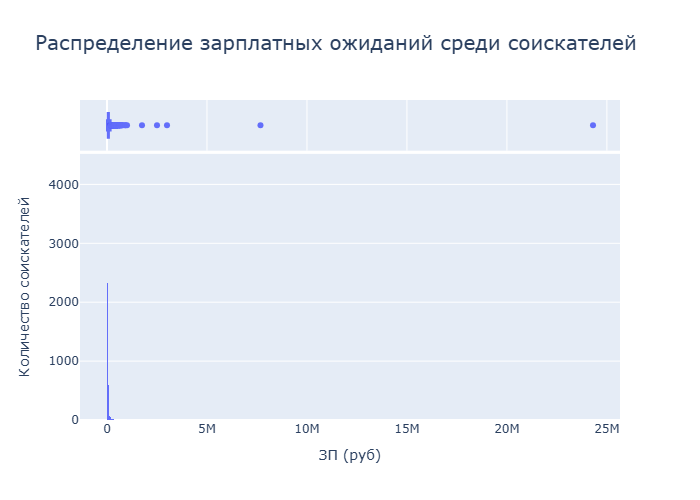

In [388]:
hist_bill = px.histogram(
    hh_work_db,
    x= 'ЗП (руб)',
    title="Распределение зарплатных ожиданий среди соискателей",
    marginal= 'box',
    width= 900,
    height=500
);

#Зададим раздельные подписи для оси y
hist_bill.update_yaxes(
    title_text='', 
    row=2,
    col=1
)

hist_bill.update_yaxes(
    title_text='Количество соискателей',
    title_font=dict(size=14),
    row=1,
    col=1
)

hist_bill.update_layout(
    title_font=dict(size=20)
)

hist_bill.write_html('html/hist_bill.html')
hist_bill.show('png')

динамический график представлен по [ссылке](html/hist_bill.html)

Из полученного графика видно:
- наибольшее количество соискателей **(мода)** ищут зарплату в диапазоне __47,5 - 52,49 тыс.руб.__;
- __минимальная__ зарплата - __1 тыс.руб.__, __максимальная__ - __более 24 млн.руб.__
- __большинство соискателей__ рассматривают зарплату __от 37 до 95 тыс.руб__;
- к _аномалиям_ можно отнести соискателей с ожидаемой зарплатой свыше __1 млн.руб.__.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

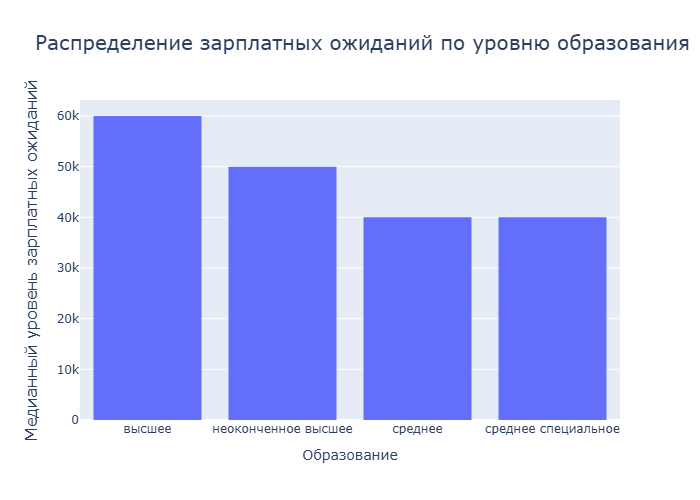

In [389]:
#Зададим фильтр по соискателям с ЗП менее 1 млн.руб.
bill_filtered = hh_work_db[hh_work_db['ЗП (руб)']<1000000]
hist_bill_edu = px.histogram(
    
    #Сгруппируем DF по категории и найдем медианное значение зарплаты
    bill_filtered.groupby(by='Образование', as_index= False)['ЗП (руб)'].median(),
    x= 'Образование',
    y= 'ЗП (руб)',
    title="Распределение зарплатных ожиданий по уровню образования",
    width= 900,
    height=600
);

hist_bill_edu.update_yaxes(
    title_text='Медианный уровень зарплатных ожиданий',
    title_font=dict(size=16),
    row=1,
    col=1
)

hist_bill_edu.update_layout(
    title_font=dict(size=20)
)

hist_bill_edu.write_html('html/hist_bill_edu.html')
hist_bill_edu.show('png')

динамический график представлен по [ссылке](html/hist_bill_edu.html)

Из полученного графика видно:
- соискатели с __высшим__ образованием ищут зарплату __выше__ других соискателей;
- __наимаеньший__ уровень зарплатных ожиданий у соискателей со __средним__ и __средне специальным__ образованием;
- __уровень обзразования__ важен для прогнозирования зарплатных ожиданий у соискателей.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

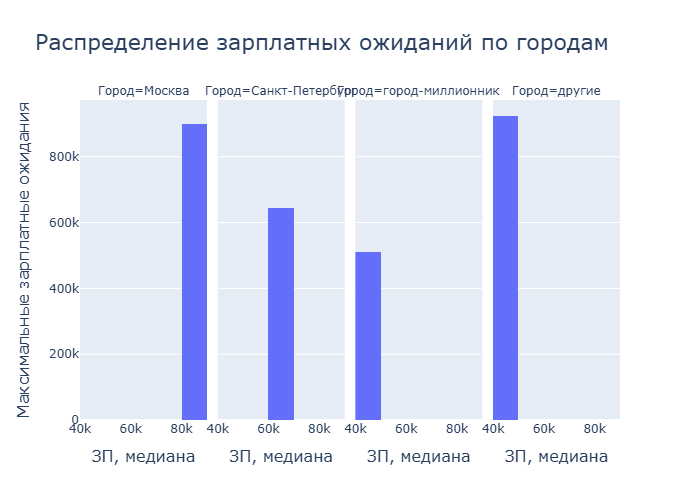

In [390]:
#Зададим фильтр по соискателям с ЗП менее 1 млн.руб.
bill_filtered = hh_work_db[hh_work_db['ЗП (руб)']<1000000]

hist_city_bill = px.histogram(
    #Сгруппируем DF по категории и найдем максимальнфе и медианное значение зарплаты
    bill_filtered.groupby(by='Город', as_index= False)['ЗП (руб)'].agg(['max','median']),
    y= 'max',
    x= 'median',
    facet_col= 'Город', #зададим категории по городам
    title="Распределение зарплатных ожиданий по городам",
    #barmode='group',
    width= 900,
    height=600,
    nbins=5
);

hist_city_bill.update_yaxes(
    title_text='Максимальные зарплатные ожидания',
    title_font=dict(size=16),
    row=1,
    col=1
)

hist_city_bill.update_xaxes(
    title_text='ЗП, медиана',
    title_font=dict(size=16)
)

hist_city_bill.update_layout(
    title_font=dict(size=22)
)

hist_city_bill.write_html('html/hist_city_bill.html')
hist_city_bill.show('png')

динамический график представлен по [ссылке](html/hist_city_bill.html)

Из полученного графика видно:
- чем __выше медианные__ зарплатные ожидания, тем __больше их размах__. ___Исключение___ на графике составляют маленькие города, в которых при __низких медианнных__ зарплатных ожиданиях наблюдается __наибольший их размах__ (предварительно __аномалия__);
- по грацику наблюдаем зависимость, что чем __больше плотность__ населения в городах, тем __выше медианные__ зарплатные ожидания.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

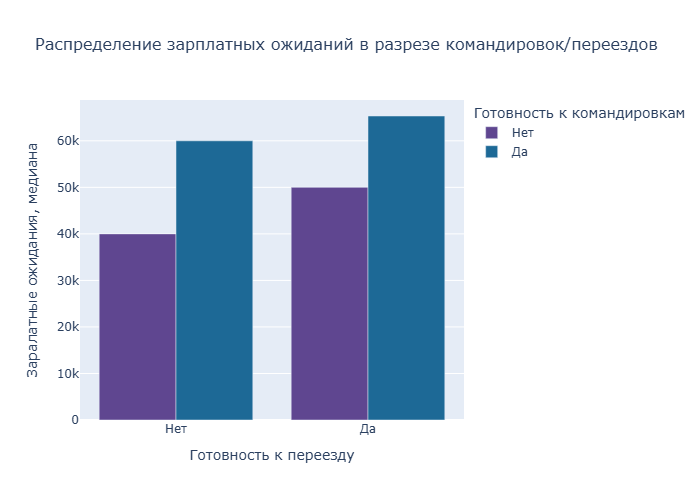

In [391]:
#Предобработаем данные, чтобы не карректировать подписи в осях и легенде

#Сгруппируем по категориям и посчитаем медианное значение ЗП
bill_filtered = hh_work_db.groupby(['Готовность к командировкам','Готовность к переезду'],as_index=False)['ЗП (руб)'].median()

#В категориях заменим True и False на Да и Нет
bill_filtered['Готовность к командировкам'] = bill_filtered['Готовность к командировкам'].apply(lambda x: "Да" if x else "Нет")
bill_filtered['Готовность к переезду'] = bill_filtered['Готовность к переезду'].apply(lambda x: "Да" if x else "Нет")

bar_reloc = px.bar(
    #Сгруппируем DF по категории и найдем максимальные и медианное значение зарплаты
    bill_filtered,
    x= 'Готовность к переезду',
    y= 'ЗП (руб)',
    color = 'Готовность к командировкам',
    title="Распределение зарплатных ожиданий в разрезе командировок/переездов",
    width= 1000,
    height=600,
    barmode='group',
    color_discrete_sequence=px.colors.qualitative.Prism,
);


bar_reloc.update_yaxes(
    title_text='Заралатные ожидания, медиана',
    title_font=dict(size=14),
)

bar_reloc.update_layout(
    title_font=dict(size=16)
)   

bar_reloc.write_html('html/bar_reloc.html')
bar_reloc.show('png')

динамический график представлен по [ссылке](html/bar_reloc.html)

Из полученного графика видно, что 
- самые __высокие__ зарплатные ожидание у соискателей, __готовых к командировкам__;
- при готовности к переезду уровень заработной платы растет, но меньше, чем у указанной выше категории

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

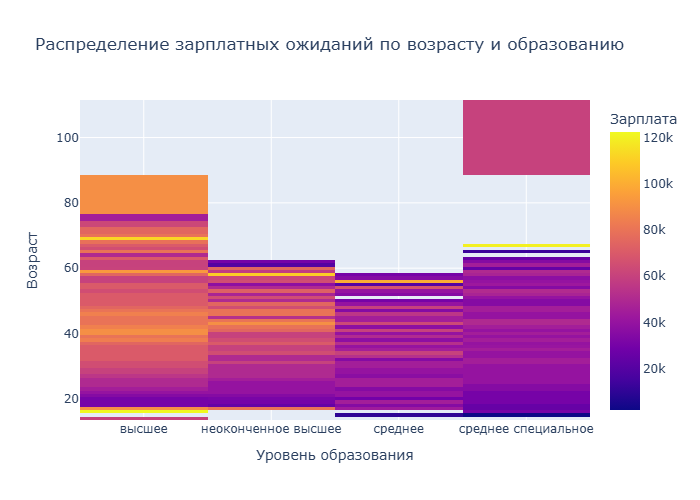

In [392]:
#найдем медианное значение зарплаты и создадим сводную таблицу
age_edu = hh_work_db.groupby(['Возраст', 'Образование'], as_index= False)['ЗП (руб)'].median()
pivot_age_edu = age_edu.pivot(
    index='Возраст',
    columns='Образование',
    values= 'ЗП (руб)',
)

piv_imshow = px.imshow(
    pivot_age_edu,
    title="Распределение зарплатных ожиданий по возрасту и образованию",
    labels=dict(y="Возраст", x="Уровень образования", color="Зарплата"),
    width=900,
    height=400
)

piv_imshow.update_yaxes(
    autorange='max'     #настроим сортировку оси y
)

piv_imshow.write_html('html/piv_imshow.html')
piv_imshow.show('png')

динамический график представлен по [ссылке](html/piv_imshow.html)

Наиболее **быстрый рост зарплат** наблюдается среди соискателей с **высшим образованием**.\
Наблюдаются **аномалии** среди соискателей со *средним специльным образованием* - в возрасте **67 лет** (зарплата 120 тыс. руб), а также **100 лет** (зарплата 60 тыс. руб.)\
Соискатели **старше 67 лет** имеют **высшее образование**.\
Начиная с определенного возраста **ожидаемый уровень зарплат** в каждой из категорий **снижается** (_аномалии_ в категории сосикателей с _высшим_ и _средне спеиальным образованием_).\
Определить зависимость роста зарплат в каждой категории достаточно сложно *без учета опыта работы и желаемой должности*.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

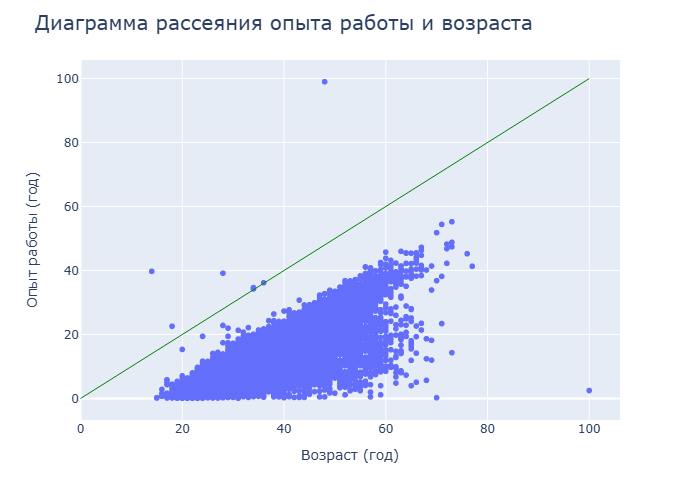

In [393]:
scatter_exp = hh_work_db.copy()
scatter_exp['Опыт работы (год)'] = scatter_exp['Опыт работы (месяц)'].apply(lambda x: x/12)
scatter_age_exp = px.scatter(
    scatter_exp,
    y= 'Опыт работы (год)',
    x= 'Возраст',
    height=500,
    width=900,
)
#Проведем линию через координты (0, 0) и (100, 100)
scatter_age_exp.add_shape(
    type="line",
    x0=0, y0=0,
    x1=100, y1=100,
    line=dict(color="green", width=1))

scatter_age_exp.update_xaxes(
    title_text= 'Возраст (год)'
)

scatter_age_exp.update_layout(
    title= 'Диаграмма рассеяния опыта работы и возраста',
    title_font=dict(size=20)
)

scatter_age_exp.write_html('html/scatter_age_exp.html')
scatter_age_exp.show('png')

динамический график представлен по [ссылке](html/scatter_age_exp.html)

Из полученного графика видим __7 точек__, у которых _опыт работы_ указан __больше__, чем их _возраст_. \
Также видны показатели, где __отсутствует опыт работы__ независимо от _возраста_ соискателей. \
Выделяются соискатели _старше 75 лет_

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


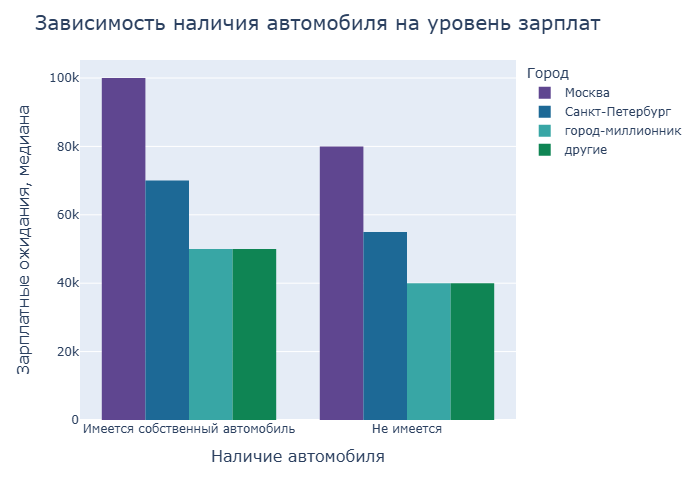

In [394]:
"Определим наличие зависимости уровня зарплат от наличия автомобиля в разрезе городов"

#Найдем медианное значение зарплат в разрезе городов и Авто
auto_db = hh_work_db[hh_work_db['ЗП (руб)']<1000000].groupby(by=['Авто', 'Город'], as_index= False)['ЗП (руб)'].median()
#Заменим значение "Не указано" в признаке Авто на "Не имеется"
auto_db['Авто'] = auto_db['Авто'].apply(lambda x: "Не имеется" if x == 'Не указано' else x)

auto_hist = px.histogram(
    auto_db,
    x = 'Авто',
    y= 'ЗП (руб)',
    color='Город',
    barmode='group',
    height= 400,
    width= 900,
    color_discrete_sequence=px.colors.qualitative.Prism
)

auto_hist.update_yaxes(
    title_text='Зарплатные ожидания, медиана',
    title_font=dict(size=16)    
)

auto_hist.update_xaxes(
    title_text='Наличие автомобиля',
    title_font=dict(size=16)    
)

auto_hist.update_layout(
    title = 'Зависимость наличия автомобиля на уровень зарплат',
    title_font=dict(size=20)
)

auto_hist.write_html('html/auto_hist.html')
auto_hist.show('png')

динамический график представлен по [ссылке](html/auto_hist.html)

С наличием автомобиля __растут зарплатные ожидания__. Рост зарплат выше в _Санкт-Петербурге_ и _Москве_.\
Рост зарплатных ожиданий:
- город-миллионник и другие - 10 тыс. руб
- Санкт-Петербург - 15 тыс. руб.
- Москва - 20 тыс. руб.

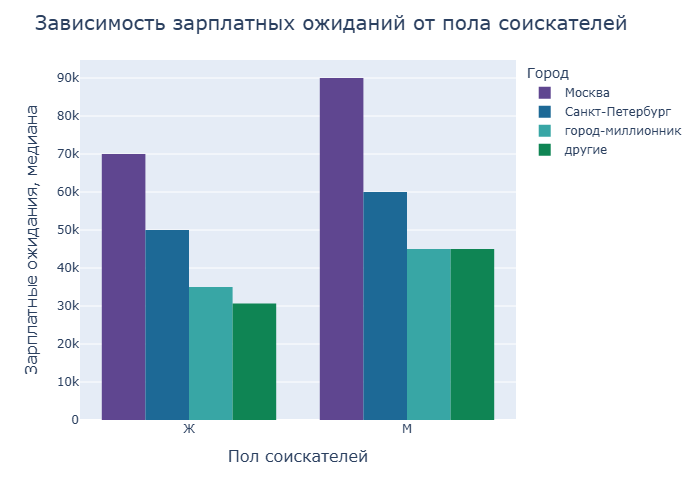

In [395]:
"Определим наличие зависимости уровня зарплат от наличия автомобиля в разрезе городов"

#Найдем медианное значение зарплат в разрезе городов и Авто
sex_db = hh_work_db[hh_work_db['ЗП (руб)']<1000000].groupby(by=['Пол', 'Город'], as_index= False)['ЗП (руб)'].median()

sex_hist = px.histogram(
    sex_db,
    x = 'Пол',
    y= 'ЗП (руб)',
    color='Город',
    barmode='group',
    height= 400,
    width= 900,
    color_discrete_sequence=px.colors.qualitative.Prism
)

sex_hist.update_yaxes(
    title_text='Зарплатные ожидания, медиана',
    title_font=dict(size=16)    
)

sex_hist.update_xaxes(
    title_text='Пол соискателей',
    title_font=dict(size=16)    
)

sex_hist.update_layout(
    title = 'Зависимость зарплатных ожиданий от пола соискателей ',
    title_font=dict(size=20)
)

sex_hist.write_html('html/sex_hist.html')
sex_hist.show('png')

динамический график представлен по [ссылке](html/sex_hist.html)

Из представленного __графика__ видно, что зарплатные ожидание у соискателей __мужского пола выше__, чем у женского. Причем зарплатные ожидания растут __выше__ в Санкт-Петербурге и Москве.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [396]:
print(f'Датафрейм содержит полных дубликатов',hh_work_db[hh_work_db.duplicated()].shape[0])
hh_work_db.drop_duplicates(inplace= True)

Датафрейм содержит полных дубликатов 161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [397]:
print('Информация о пропусках в признаках')
null_count_dict = {}
for column in hh_work_db.columns:
    null_count_dict[column] = hh_work_db[hh_work_db[column].isna()].shape[0]

df = pd.DataFrame.from_dict(null_count_dict, orient= 'Index',columns=['Количество пустых значений'])    
display(df[df['Количество пустых значений']!=0])

Информация о пропусках в признаках


,Количество пустых значений
Последнее/нынешнее место работы,1
Последняя/нынешняя должность,2
Опыт работы (месяц),168


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [398]:
hh_work_db.dropna(subset=["Последнее/нынешнее место работы","Последняя/нынешняя должность"], how='any', inplace= True)
hh_work_db.fillna({'Опыт работы (месяц)':hh_work_db['Опыт работы (месяц)'].median()}, inplace= True)

print(f'Cреднее значение по опыту работы:',int(hh_work_db['Опыт работы (месяц)'].mean()))

Cреднее значение по опыту работы: 114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [399]:
lower_limit = hh_work_db['ЗП (руб)']>=1000       #нижняя граница
upper_limit = hh_work_db['ЗП (руб)']<=1000000    #верхняя граница
before_clean_shape = hh_work_db.shape[0]         #размер таблицы до очистки
hh_work_db = hh_work_db[lower_limit&upper_limit] #очищенные данные

print(f'Количество очищенных выбросов:', before_clean_shape-hh_work_db.shape[0])    

Количество очищенных выбросов: 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [400]:
mask = hh_work_db['Опыт работы (месяц)']/12>hh_work_db['Возраст']
print(f'Количество резюме, в которых опыт работы в годах превышал возраст соискателя:',hh_work_db[mask].shape[0]) #количество выбросов

hh_work_db = hh_work_db[~mask] #Очистка от выбросов с инвертированной маской

Количество резюме, в которых опыт работы в годах превышал возраст соискателя: 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

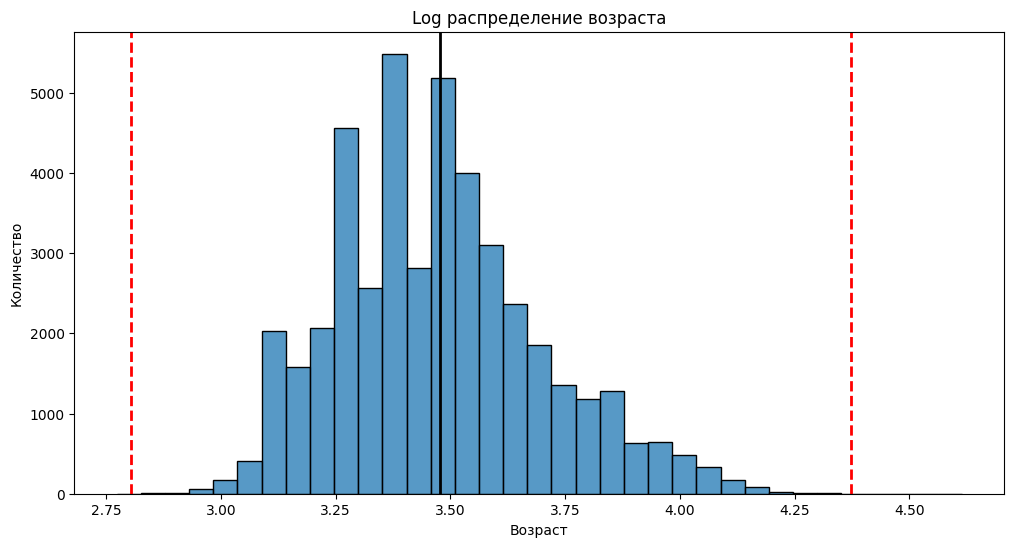

In [401]:
#Параметризация сигм
left = 3
right = 4

#Строим график распределения
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
log_age = np.log(hh_work_db['Возраст'] + 1)
histplot = sns.histplot(log_age, bins=35, ax=ax)
histplot.set_title('Log распределение возраста')
histplot.set_ylabel('Количество')

#Проведем маркеры в соответствии с методом z-отклонений
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean()+ right * log_age.std(), color='red', ls='--', lw=2)
histplot.axvline(log_age.mean()- left * log_age.std(), color='red', ls='--', lw=2);

#функция определения выбросов методом z-отклонения с параметризацией
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_b = mu - left*sigma
    upper_b = mu + right*sigma
    outliers = data[(x<lower_b)|(x>upper_b)]
    cleaned = data[(x>=lower_b)&(x<=upper_b)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score_mod(hh_work_db, 'Возраст', log_scale=True, left= left, right= right)

In [402]:
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')

print('Log-распределение ассиметрично', 'влево' if log_age.skew()<0 else 'вправо')

print(f'Под выбросы попадают резюме с указанным возрастом:',list(outliers['Возраст'].unique()))
display(outliers)

Число выбросов по методу z-отклонения: 3
Log-распределение ассиметрично вправо
Под выбросы попадают резюме с указанным возрастом: [15, 100]


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,полный день,сменный график,вахтовый метод,удаленная работа,частичная занятость,проектная работа,полная занятость,стажировка,волонтерство,ЗП (руб)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,среднее,М,15,2.0,Санкт-Петербург,...,False,True,False,True,True,False,False,False,False,10000.0
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,среднее специальное,М,15,3.0,другие,...,True,False,False,False,False,False,True,False,False,2000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,среднее специальное,М,100,30.0,Санкт-Петербург,...,True,False,False,True,True,True,True,True,False,60000.0


In [403]:
#Запишем очищенный результат в текущий датафрейм
hh_work_db = cleaned.copy()
hh_work_db.to_csv('data/cleaned_hh_data.csv', index=False, sep= ';')